In [1]:
from utils import file_parsing_utils as fpu
from collections import defaultdict

# Individual VCF analysis

In [8]:
filepath = '/storage/NFS/ANALYSIS/DNAseq/VCF_ann/catVariants_p_fal_Skinner-Adams_3D7_C4_raw.snp.indels.vcf.ann.txt'
parent = '3D7-C4'

site_allele_anno_dict = defaultdict(dict)
clone_mutation_records_dict = fpu.parse_annotated_VCF(filepath, site_allele_anno_dict, 
                                                      parent_sample=parent, tqdm_on=True)

16461it [00:44, 373.87it/s]

Number of variants retained: 136


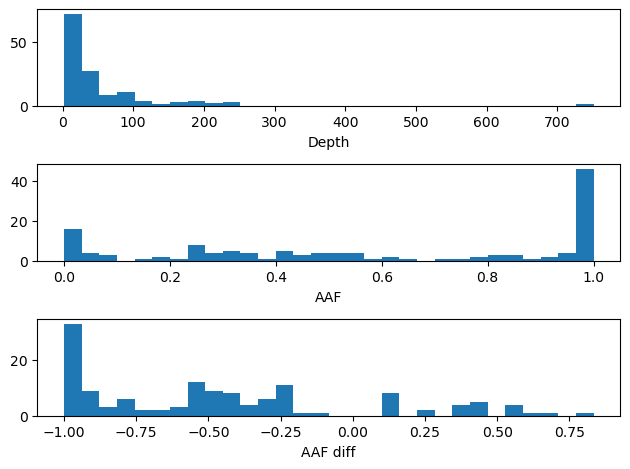

In [9]:
desired_samples = list(clone_mutation_records_dict.keys())

fpu.summarize_mutation_statistics(clone_mutation_records_dict, desired_samples)

In [10]:
filtered_clone_mutation_records_dict = fpu.filter_mutation_records(clone_mutation_records_dict, min_AAF=0.3, min_AAF_diff=0.6)

In [11]:
for clone in filtered_clone_mutation_records_dict:
    print(clone)
    for mutation_record in filtered_clone_mutation_records_dict[clone]:
        CHROM, POS, QUAL, GT, AD, parent_AD, REF, ALT = mutation_record
        effect, impact, codon_change, aa_change, gene = fpu.annotate_record(mutation_record, site_allele_anno_dict)
        print(CHROM, POS, AD, parent_AD, effect, aa_change, gene, gene_)
    print()

3D7-C4-4T-14
Pf3D7_03_v3 670335 0,184 138,0 missense_variant p.Ile92Leu/c.274A>C PF3D7_0316600
Pf3D7_05_v3 958767 0,227 93,0 missense_variant p.Gly293Val/c.878G>T PF3D7_0523000
Pf3D7_08_v3 1333456 1,12 5,0 intron_variant c.108+62_109-50delTATATATATATATATA PF3D7_0831200
Pf3D7_09_v3 236870 0,27 17,0 intron_variant c.5986-25_5986-22delATAT PF3D7_0905100
Pf3D7_09_v3 1203204 0,26 33,0 missense_variant p.Thr465Ser/c.1393A>T PF3D7_0930300
Pf3D7_11_v3 543 0,3 121,0 intergenic_region n.543A>G 
Pf3D7_11_v3 549 0,3 114,0 intergenic_region n.549T>G 
Pf3D7_12_v3 1219443 0,17 11,1 intron_variant c.6669-16_6669-12delATTTT PF3D7_1229800
Pf3D7_14_v3 1038 0,5 103,1 upstream_gene_variant c.-355A>G PF3D7_1400100

3D7-C4-4T-8
Pf3D7_03_v3 670335 0,181 138,0 missense_variant p.Ile92Leu/c.274A>C PF3D7_0316600
Pf3D7_05_v3 958767 0,219 93,0 missense_variant p.Gly293Val/c.878G>T PF3D7_0523000
Pf3D7_06_v3 1250787 0,92 85,0 missense_variant p.Val126Leu/c.376G>T PF3D7_0629900
Pf3D7_08_v3 324424 0,8 6,0 intron_varia

In [5]:
fpu.inspect_VCF_row(filepath, 'M76611', 3527)

#CHROM : M76611
POS : 3527
ID : .
REF : C
ALT : A
QUAL : 11394.14
FILTER : .
INFO : AC=2;AF=0.333;AN=6;BaseQRankSum=3.700;ClippingRankSum=-0.695;DP=3203;ExcessHet=0.4576;FS=0.000;MLEAC=2;MLEAF=0.333;MQ=60.00;MQRankSum=-0.292;QD=33.51;ReadPosRankSum=-1.767;SOR=0.660;EFF=missense_variant(MODERATE|MISSENSE|caC/caA|p.His12Gln/c.36C>A|376|mal_mito_3|protein_coding|CODING|rna_mal_mito_3-1|1|A),downstream_gene_variant(MODIFIER||56|c.*56C>A|478|mal_mito_2|protein_coding|CODING|rna_mal_mito_2-1||A)
FORMAT : GT:AD:DP:GQ:PL
Wirth-ELQ300-NF54-10nM : 0/0:852,13:865:99:0,2108,33762
Wirth-ELQ300-NF54-50nM : 1/1:24,316:340:89:11432,89,0
Wirth-ELQs-NF54-parent : 0/0:1990,0:1990:99:0,5976,75580
